<a href="https://colab.research.google.com/github/mahikshith/Langgraph/blob/main/Adding_nodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install langgraph langchain

In [4]:
from typing import Dict , TypedDict
from langgraph.graph import StateGraph   # design and manage flow of tasks in ur application usinf graph

## Single node - single input :

In [13]:
# nodes pass information in the form of state

# state is in dict format

# state is data structure [shared] that keeps a track of everything as ur applcation runs

class AgentState(TypedDict) :
  message : str



# define node - node takes input as state and pass output as state [updated]

# need to add a doc string to expalin the functionality of the agent

def first_node(state : AgentState) -> AgentState :

  '''Simple node in the graph that just shows greet message to the state '''

  state["message"] = "Wasssup " + state["message"] + " how are u doing"

  return state


In [22]:
# creating graph

gf = StateGraph(AgentState)

gf.add_node("wassup",first_node)

# need to add start and end point of the node

gf.set_entry_point("wassup")

gf.set_finish_point("wassup")

app = gf.compile()


In [23]:
display(app.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'wassup': Node(id='wassup', name='wassup', data=wassup(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='wassup', data=None, conditional=False), Edge(source='wassup', target='__end__', data=None, conditional=False)])

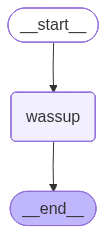

In [24]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
ans = app.invoke({"message" : "mykee"})

In [26]:
ans

{'message': 'Wasssup mykee how are u doing'}

In [27]:
ans["message"]   # reference the attribute

'Wasssup mykee how are u doing'

## Singel node - multiple input :

In [28]:
from typing import List , TypedDict

In [29]:
class stater(TypedDict) :  #  we can name it anyhting we want

  val : List[int]
  name : str
  res :str

In [47]:
# node

# remember that state is a dict

def process_node(state : stater) -> stater :

  ''' this node process the info in the state and returns a result'''

  print(f"this is before : {state}")

  state["res"] = state["name"] + " , here is the sum of vals in the given list " + str(sum(state["val"]))

  print(f"this is after : {state}")



  return state

In [48]:
# adding node to graph

gf = StateGraph(stater)

gf.add_node("process",process_node)

gf.set_entry_point("process")

gf.set_finish_point("process")

app = gf.compile()


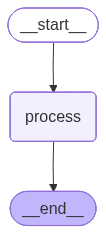

In [49]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [51]:
#  val : List[int]
#   name : str
#   res :str

ans = app.invoke({"val":[50,45,22,89], "name": "mykee"})

this is before : {'val': [50, 45, 22, 89], 'name': 'mykee'}
this is after : {'val': [50, 45, 22, 89], 'name': 'mykee', 'res': 'mykee , here is the sum of vals in the given list 206'}


In [52]:
ans["res"]

'mykee , here is the sum of vals in the given list 206'

## Single node - multi input - if else :

In [62]:
# if operation = "+" then add , if operation = "*" then multiply

# state

class operate(TypedDict) :

  val1 : List[int]
  strin : str
  operation : str
  result : str

In [77]:
# node

import math

def noder(state : operate) -> operate :

  ''' thids node processes input via if-else'''

  if state["operation"] == "+" :

    state["result"] = f"Hey, {state["strin"]} the selected operator is sum and the value is : " + str(sum(state["val1"]))

  elif state["operation"] == "*":
    state["result"] = f"Hey,  {state["strin"]} the selected operator is multiplication and val is : " + str(math.prod(state["val1"]))

  else :
    state["result"] = "Invalid operation"

  return state


In [78]:
# adding node to the state graph

gf = StateGraph(operate)

gf.add_node("operations",noder)

gf.set_entry_point("operations")

gf.set_finish_point("operations")

app = gf.compile()

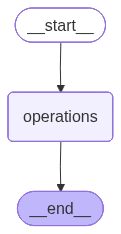

In [79]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [93]:
  # val1 : List[int]
  # strin : str
  # operation : str
  # result : str

r = input("enter a name: ")

k = input("enter the operation : [*] or [+]")

print("enter the number with spaces and then press enter")

li = list(map(int,input().split()))

ans = app.invoke({"val1":li,"strin":r, "operation": k})

enter a name: mykee
enter the operation : [*] or [+]*
enter the number with spaces and then press enter
1 2 3 4 5 6 7 8 9 10


In [94]:
ans["result"]


'Hey,  mykee the selected operator is multiplication and val is : 3628800'

## multiple nodes : sequential  graph :

In [100]:
# name , age , skills

class person(TypedDict) :   # state

  name : str

  age : int

  skills : list[str]

  result : str


# nodes


def first_node(state : person) -> person :

  ''' this first node greets user '''

  state["result"] = f"hello {state["name"]}  , welcome"

  return state

def second_node(state : person) -> person :

  ''' this second  node tells user  age '''

  state["result"] = state["result"] + f" you are {state["age"]}  years old "

  return state

def third_node(state : person) -> person :

  ''' this third   node tells user  their skills '''

  state["result"] = state["result"] + f"these are your skills {state["skills"]}  and keep improving them"

  return state



In [96]:
# adding nodes to graph

gf = StateGraph(person)

gf.add_node("greet",first_node)
gf.add_node("age",second_node)
gf.add_node("skills",third_node)

gf.set_entry_point("greet")
gf.set_finish_point("skills")

gf.add_edge("greet","age")
gf.add_edge("age","skills")

app = gf.compile()

In [101]:
name = input("enter your name : ")
age = int(input("enter your age : "))
skills = list(map(str,input("enter your skills : ").split()))

ans = app.invoke({"name":name,"age":age,"skills":skills})


enter your name : mykee
enter your age : 25
enter your skills : py sql lang mL dL sql


In [102]:
ans["result"]

"hello mykee  , welcomeyou are 25  years old these are your skills ['py', 'sql', 'lang', 'mL', 'dL', 'sql']  and keep improving them"

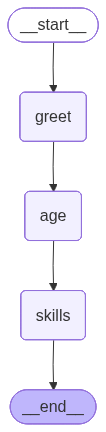

In [103]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))